# <font color='blue'>Análise dos dados do Prouni</font>

In [1]:
#Importação das Bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## Importação das bases do Prouni

In [2]:
# df_2018 = pd.read_csv('/media/joao/DATA/TCE/Bases/Prouni_2018.csv', sep=',') #Linux

df_2018 = pd.read_csv('Bases/Prouni_2018.csv', sep=';') #Windows 
# df_2018.head() 
# df_2018.shape

df_2017 = pd.read_csv('Bases/Prouni_2017.csv', sep=';') #Windows 
# df_2017.head() 
# df_2017.shape

df_2016 = pd.read_csv('Bases/Prouni_2016.csv', sep=';') #Windows 
# df_2016.head() 
# df_2016.shape

df_2015 = pd.read_csv('Bases/Prouni_2015.csv', sep=';') #Windows 
# df_2015.head() 
# df_2015.shape

df_2014 = pd.read_csv('Bases/Prouni_2014.csv', sep=';') #Windows 
# df_2014.head() 
# df_2014.shape

df_2013 = pd.read_csv('Bases/Prouni_2013.csv', sep=';') #Windows 
# df_2013.head() 
# df_2013.shape

df_2012 = pd.read_csv('Bases/Prouni_2012.csv', sep=';') #Windows 
# df_2012.head() 
# df_2012.shape

df_2011 = pd.read_csv('Bases/Prouni_2011.csv', sep=';') #Windows 
# df_2011.head() 
# df_2011.shape

df_2010 = pd.read_csv('Bases/Prouni_2010.csv', sep=';') #Windows 
# df_2010.head() 
# df_2010.shape

df_2009 = pd.read_csv('Bases/Prouni_2009.csv', sep=';') #Windows 
# df_2009.head() 
# df_2009.shape

df_2008 = pd.read_csv('Bases/Prouni_2008.csv', sep=';') #Windows 
# df_2008.head() 
# df_2008.shape

df_municipios = pd.concat([df_2008, df_2009, df_2010, df_2011, df_2012, 
                           df_2013, df_2014, df_2015, df_2016, df_2017, df_2018])
df_municipios.shape

(2164089, 15)

## Bolsas de santos por ano 

In [3]:
df_santos = df_municipios[df_municipios.MUNICIPIO_BENEFICIARIO_BOLSA == "SANTOS"]
df_santos_ano = df_santos.set_index(['MUNICIPIO_BENEFICIARIO_BOLSA','ANO_CONCESSAO_BOLSA'])
df_santos_ano = df_santos_ano.groupby(level = ['MUNICIPIO_BENEFICIARIO_BOLSA', 'ANO_CONCESSAO_BOLSA'])
df_santos_ano = df_santos_ano.size()  #Tamanho de cada Grupo 
df_santos_ano

MUNICIPIO_BENEFICIARIO_BOLSA  ANO_CONCESSAO_BOLSA
SANTOS                        2008                   187
                              2009                   376
                              2010                   284
                              2011                   367
                              2012                   377
                              2013                   362
                              2014                   476
                              2015                   596
                              2016                   630
                              2017                   598
                              2018                   455
dtype: int64

## Bolsas de santos por ano e por curso

In [4]:
#Subset dos dados por Curso e por ano
df_curso_santos = df_santos.set_index(['NOME_CURSO_BOLSA','ANO_CONCESSAO_BOLSA'])
df_curso_santos = df_curso_santos.groupby(level = ['NOME_CURSO_BOLSA', 'ANO_CONCESSAO_BOLSA'])
df_curso_santos = df_curso_santos.size()           #Tamanho de cada Grupo 
df_curso_santos = df_curso_santos.sort_values(ascending = False)
df_curso_santos.head(20) 

NOME_CURSO_BOLSA   ANO_CONCESSAO_BOLSA
Direito            2016                   69
Administração      2009                   68
                   2016                   61
Direito            2015                   61
Administração      2014                   58
                   2015                   57
                   2011                   56
ADMINISTRAÇÃO      2018                   54
DIREITO            2017                   53
Administração      2012                   51
                   2013                   45
ADMINISTRAÇÃO      2017                   45
DIREITO            2018                   44
Direito            2014                   41
Administração      2010                   39
Comércio Exterior  2015                   36
                   2014                   35
                   2012                   33
Engenharia Civil   2014                   31
                   2015                   31
dtype: int64

## Tratamento dos dados 

In [5]:
# Tratamento dos dados para correção de letras Maíusculas e Minúsculas 

df_curso_santos = pd.DataFrame(df_curso_santos) # Conversão para DataFrame para usar os métodos dos Pandas
df_curso_santos = df_curso_santos.reset_index()

In [6]:
df_curso_santos = df_curso_santos.rename(columns = {'NOME_CURSO_BOLSA':'NOME_CURSO_BOLSA', 
                                  'ANO_CONCESSAO_BOLSA':'ANO',
                                   0:'QUANTIDADE_BOLSAS'})
df_curso_santos.head(15)

,NOME_CURSO_BOLSA,ANO,QUANTIDADE_BOLSAS
0,Direito,2016,69
1,Administração,2009,68
2,Administração,2016,61
3,Direito,2015,61
4,Administração,2014,58
5,Administração,2015,57
6,Administração,2011,56
7,ADMINISTRAÇÃO,2018,54
8,DIREITO,2017,53
9,Administração,2012,51


In [7]:
# Converte o nome do curso para letras Maíusculas 
df_curso_santos['CURSO'] = [x.upper() for x in df_curso_santos['NOME_CURSO_BOLSA']]
df_curso_santos.head(15)

,NOME_CURSO_BOLSA,ANO,QUANTIDADE_BOLSAS,CURSO
0,Direito,2016,69,DIREITO
1,Administração,2009,68,ADMINISTRAÇÃO
2,Administração,2016,61,ADMINISTRAÇÃO
3,Direito,2015,61,DIREITO
4,Administração,2014,58,ADMINISTRAÇÃO
5,Administração,2015,57,ADMINISTRAÇÃO
6,Administração,2011,56,ADMINISTRAÇÃO
7,ADMINISTRAÇÃO,2018,54,ADMINISTRAÇÃO
8,DIREITO,2017,53,DIREITO
9,Administração,2012,51,ADMINISTRAÇÃO


In [8]:
# Criação do Subset tratado com dos dados de cursos por ano e no munícipio de Santos

df_cursos = df_curso_santos[['CURSO','ANO','QUANTIDADE_BOLSAS']]   
df_curso_santos = df_cursos.sort_values('QUANTIDADE_BOLSAS', ascending = False)
df_curso_santos.head(20)

,CURSO,ANO,QUANTIDADE_BOLSAS
0,DIREITO,2016,69
1,ADMINISTRAÇÃO,2009,68
2,ADMINISTRAÇÃO,2016,61
3,DIREITO,2015,61
4,ADMINISTRAÇÃO,2014,58
5,ADMINISTRAÇÃO,2015,57
6,ADMINISTRAÇÃO,2011,56
7,ADMINISTRAÇÃO,2018,54
8,DIREITO,2017,53
9,ADMINISTRAÇÃO,2012,51


In [9]:
# Identifica qual é o curso com mais bolsas no municipio de Santos 

df_direito = df_cursos[df_cursos.CURSO == 'DIREITO'] 
df_agg_direito = df_direito.groupby('CURSO').sum()

df_adm = df_cursos[df_cursos.CURSO == 'ADMINISTRAÇÃO']
df_agg_adm = df_adm.groupby('CURSO').sum()


In [10]:
# Concatena os subsets de Direito e Adminstração 
df_bolsas = pd.concat([df_agg_direito[['QUANTIDADE_BOLSAS']],df_agg_adm[['QUANTIDADE_BOLSAS']]])

In [11]:
#Apresenta a base concatenada
df_bolsas.sort_values('QUANTIDADE_BOLSAS', ascending = False)

,QUANTIDADE_BOLSAS
CURSO,
ADMINISTRAÇÃO,558
DIREITO,425


## Relação entre o número de bolsas concedidas e bolsas para a um curso específico

### Implementação de Modelo de Machine Learning : Regressão Linear

### <font color='blue'>Dos conjuntos de técnicas de regressão, a regressão linear é a mais simples em análises de dados que procuram entender a relação entre o comportamento de determinado fenômeno e o comportamento de uma variávvel, sem que haja, entretanto uma obrigatória relação de causa e efeito.</font>

### 1º Passo: Verificar a relação entre as variáveis por meio do Gráfico de Dispersão

### Curso de Administração 

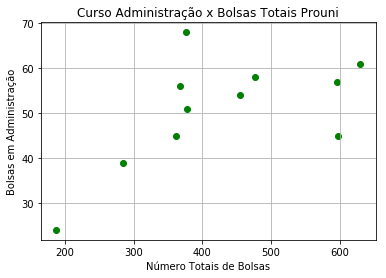

In [24]:
# Scatter Plot representando a dispersão dos dados 
x = df_santos_ano.values                  # Eixo x do gráfico: Número de bolsas por ano no município de Santos 

df_adm  = df_adm .sort_values('ANO')      # Eixo y do gráfico: Número de bolsa por ano para o curso de Administração
y = df_adm ['QUANTIDADE_BOLSAS']

plt.scatter(x, y,  color = 'green')
plt.xlabel('Número Totais de Bolsas')
plt.ylabel('Bolsas em Administração')
plt.title('Curso Administração x Bolsas Totais Prouni')
plt.grid(True)
plt.show()

### Curso de Direito

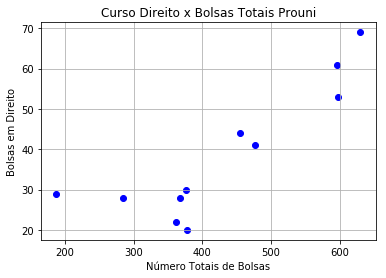

In [28]:
# Scatter Plot representando a dispersão dos dados 
x = df_santos_ano.values                           # Eixo x do gráfico: Número de bolsas por ano no município de Santos 

df_direito  = df_direito.sort_values('ANO')        # Eixo y do gráfico: Número de bolsa por ano para o curso de Direito
y = df_direito['QUANTIDADE_BOLSAS']

plt.scatter(x, y,  color = 'blue')
plt.xlabel('Número Totais de Bolsas')
plt.ylabel('Bolsas em Direito')
plt.title('Curso Direito x Bolsas Totais Prouni')
plt.grid(True)
plt.show()


### 2º Passo: Traçar a Reta de Projeção

## Pacote StatsModel 

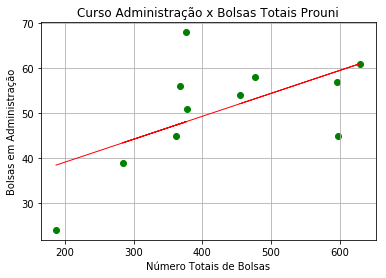

In [25]:
# Implementação como StatsModel 

# Traço da Reta de projeção para o Curso de Adminstração
plt.scatter(x, y,  color = 'green')

# Identificação da variável independente: Número de bolsas 
X_sm = sm.add_constant(x)

# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
# Variável dependente: Número de bolsas do curso
results = sm.OLS(y, X_sm).fit()
plt.plot(x, results.predict(X_sm), color = 'red', linewidth = 1)
plt.xlabel('Número Totais de Bolsas')
plt.ylabel('Bolsas em Administração')
plt.title('Curso Administração x Bolsas Totais Prouni')
plt.grid(True)
plt.show()

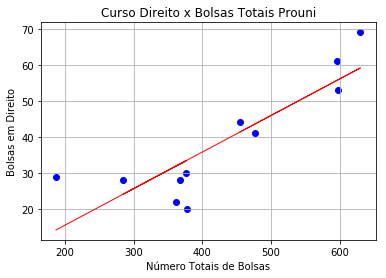

In [29]:
# Traço da Reta de projeção para o Curso de Direito
plt.scatter(x, y,  color = 'blue')

# Identificação da variável independente: Número de bolsas 
X_sm = sm.add_constant(x)

# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
# Variável dependente: Número de bolsas do curso
results = sm.OLS(y, X_sm).fit()
plt.plot(x, results.predict(X_sm), color = 'red', linewidth = 1)
plt.xlabel('Número Totais de Bolsas')
plt.ylabel('Bolsas em Direito')
plt.title('Curso Direito x Bolsas Totais Prouni')
plt.grid(True)
plt.show()

### Coeficiente R²: diz o quanto o meu modelo explica seus resultados. 
### É um valor entre 0 e 1. Quanto mais próximo de 1, melhor.

In [32]:
### Dados estatísticos do Modelo de Dados 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      QUANTIDADE_BOLSAS   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     25.78
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           0.000665
Time:                        14:46:32   Log-Likelihood:                -38.400
No. Observations:                  11   AIC:                             80.80
Df Residuals:                       9   BIC:                             81.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7730      8.949     -0.533      0.607     -25.017      15.471
x1             0.1014      0.020      5.078      0.001       0.056       0.147
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.249
Skew:                           0.155   Prob(JB):                        0.883
Kurtosis:                       2.331   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Simulação de Projeção de Número de bolsas

In [59]:
print("Número de bolsas de direito %.0f" % results.predict([1, 425]))

Número de bolsas de direito 38


### O método fit() aprende os parâmetros do modelo de regressão linear simples:

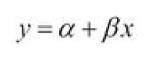

In [31]:
from IPython.display import Image
Image('linear.png')